# Minor project

## Objective of this Analysis:

* To understand the how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).


## What to do in  Exploratory Data Analysis:

* To Analyse insights in the dataset.
* To understand the connection between the variables and to uncover the underlying structure
* To extract the important Variables.
* To test the underlying assumptions.
* Provide Insights with Suitable Graphs and Visualizations.
* Write all your inferences with supporting Analysis and Visualizations.

# We will import pandas, numpy, seaborn and matplotlib libraries.

In [1]:
import pandas as pd                  #pandas is a data frame library
import matplotlib.pyplot as plt      #matplotlib.pyplot plots data
import numpy as np 
import seaborn as sns
#numpy provides N-dim objects
#do plotting inline instead of seperate window
%matplotlib inline

import os
for dirname,_,filenames in os.walk('//input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load the data csv file into memory

In [2]:
df=pd.read_csv("C:\\Users\\tanis\\Downloads\\StudentsPerformance (1).csv")

In [3]:
df  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* Count : Shows the total number.
* Mean : Shows the average.
* Std : Standard deviation value
* Min : Minimum value
* %25 : First Quantile
* %50 : Median or Second Quantile
* %75 : Third Quantile
* Max : Maximum value

### What is quantile?

* 1,4,5,6,7,11,12,13,14,15,16,17
* The median is the number that is in middle of the sequence. In this case It would be 11
* The lower quartile is the median in between the smallest number and the median etc in between 1 and 11, which is 6
* The upper quartile you find the median between the median and the largest number etc. betweeb 11 and 17,which will be 14 according to the question above

In [6]:
df.shape # shows number of rows and coloumn 

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No null value is present

In [8]:
def plot_corr(df, size=11):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),(corr.columns))
    plt.yticks(range(len(corr.columns)),(corr.columns))

 ### Finding correlation between math score, reading score and writing score.      

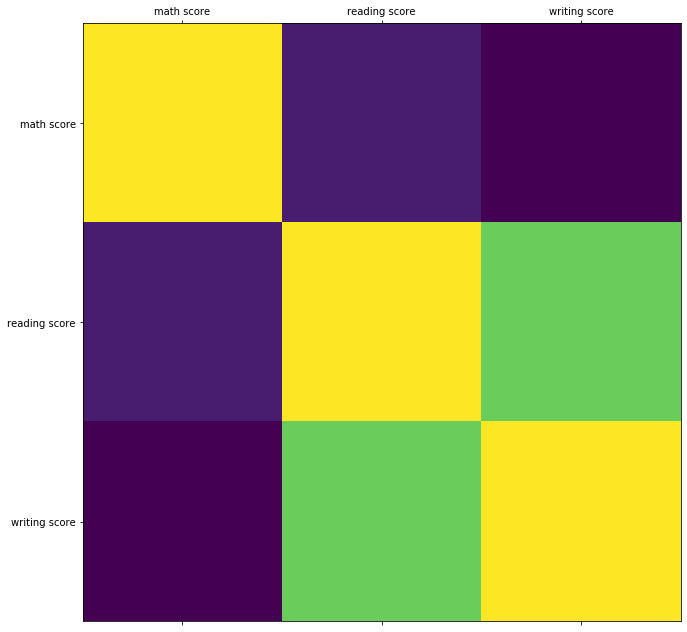

In [9]:
plot_corr(df)                                

In [10]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Maximum correlation is between reading and writing score

# Graphs and Visualisations

### Individual Scores VS Student Count 

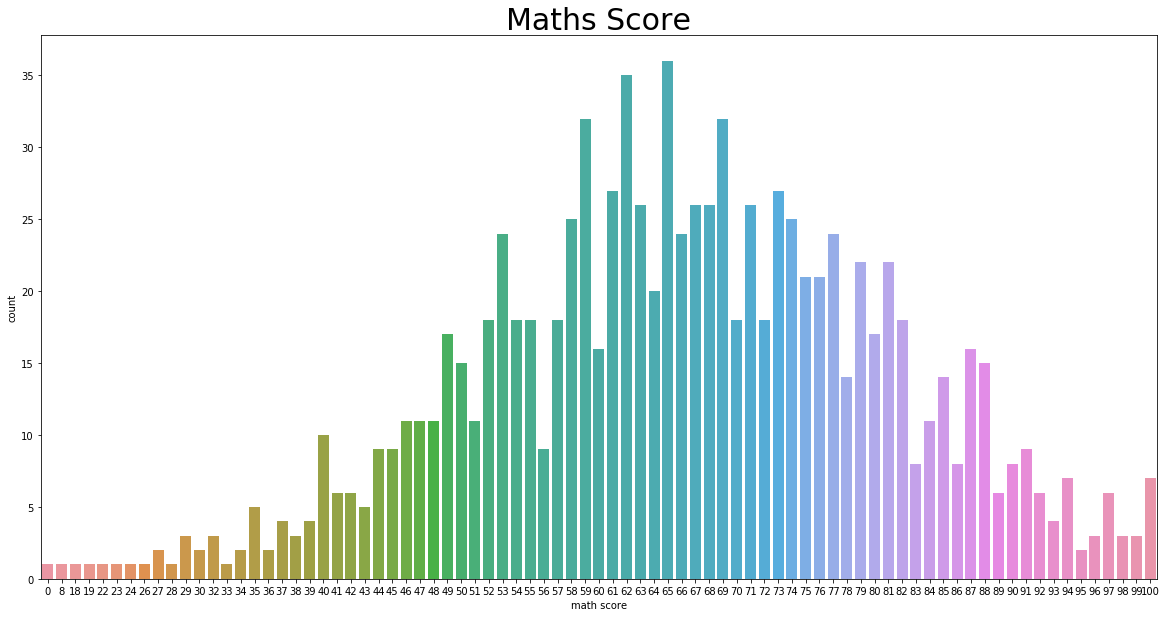

In [49]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(df['math score'])
plt.title('Maths Score',fontsize=30)
plt.show()

* x axis as maths score and  y axis as number of student 
* Maimum number of students got 65 marks in maths
* More than 5 student got 100 marks
* Less than 5 students got 0 marks

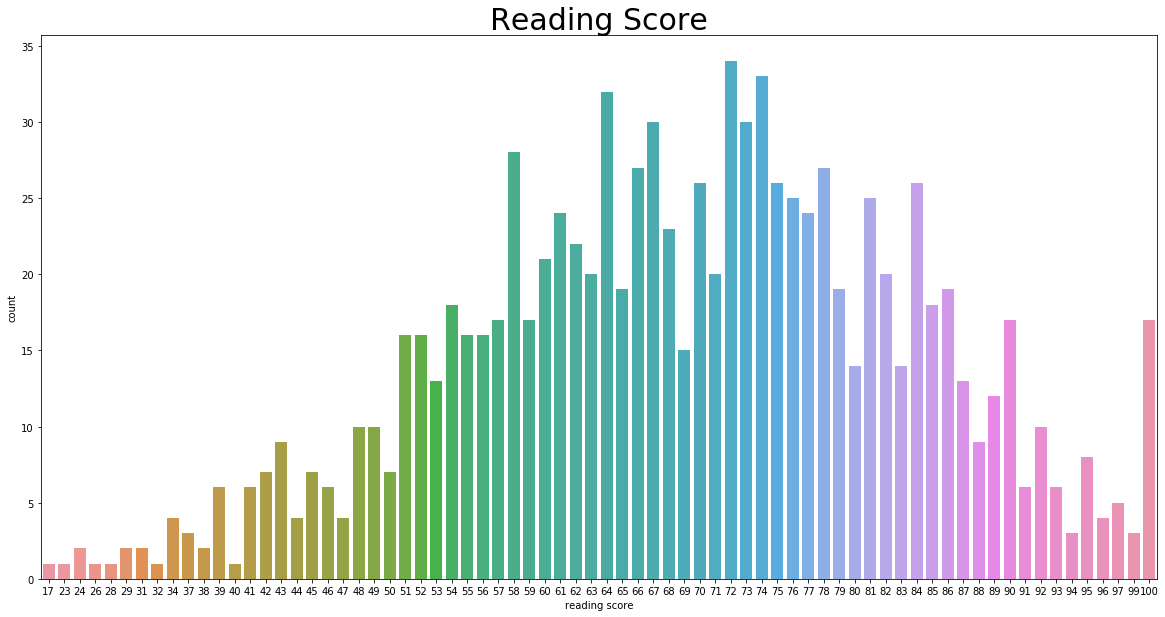

In [12]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(df['reading score'])
plt.title('Reading Score',fontsize=30)
plt.show()

* x axis as reading  score and y axis as number of students
* Maimum number of students got 72 marks in reading
* More than 15 students got 100 marks
* Less than 5 students got 0 marks

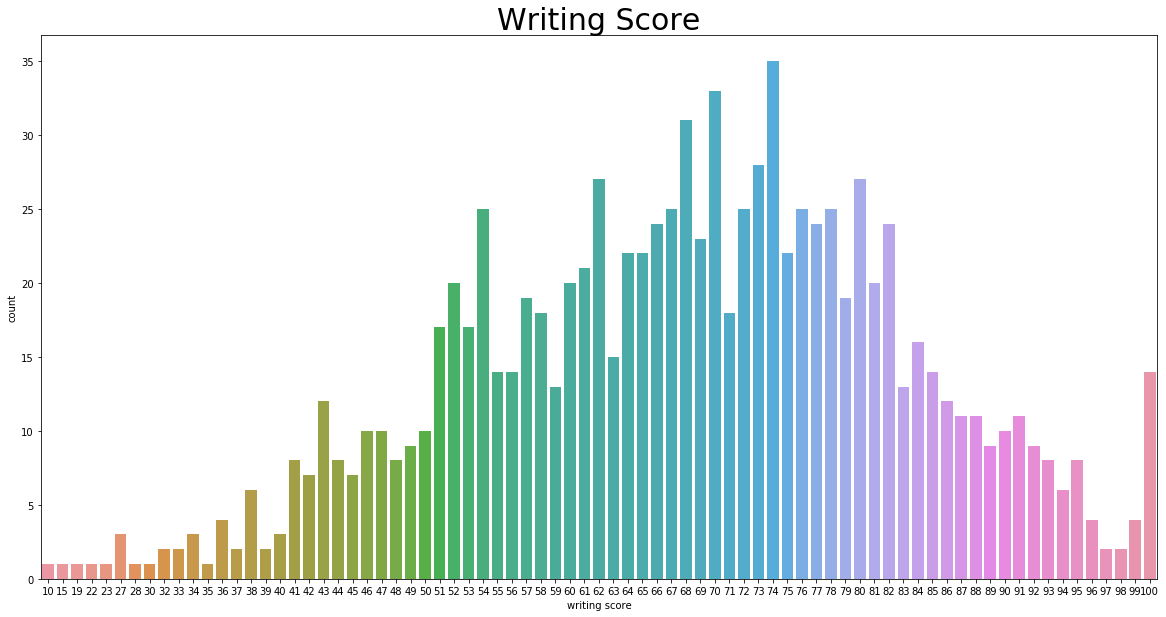

In [13]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(df['writing score'])
plt.title('Writing Score',fontsize=30)
plt.show()


* x axis as writing score and y axis as number of student 
* Maimum number of students got 74 marks in reading
* More than 15 students got 100 marks
* Less than 5 students got 0 marks

### Violin Plot for observing scored marks distribution among students

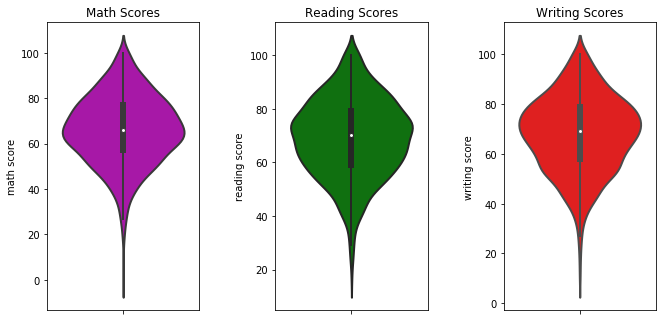

In [23]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,color='m',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=df,color='g',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=df,color='r',linewidth=2)
plt.show()

#### Maximum number of students scored 60-80 marks in all three subjects.

### Pie chart illustrating proportion of each groups

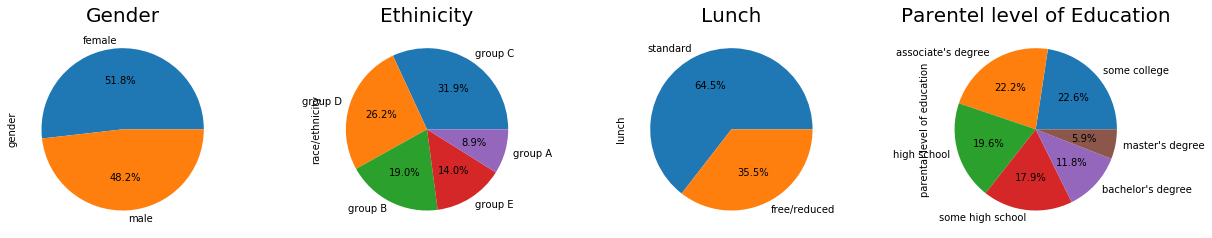

In [24]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

* Male and female are almost in same proportion.
* In ethnicity group c has highest proportion.
* Most students opt for standard lunch.
* Highest proportion of parentel level of Education is 'Some college', 'associate's degreee' and 'high school'

### Plot for Gender Vs Individual Score

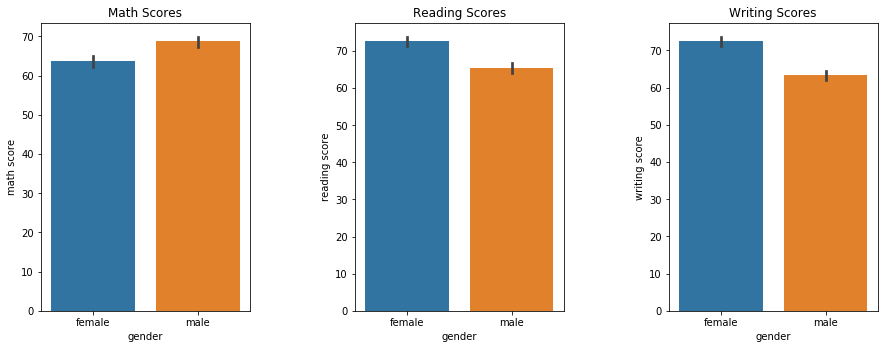

In [62]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

*  Male scored more in maths
*  Female scored more in reading and writing

### Plot for correlation between Test Preparation vs other Groups

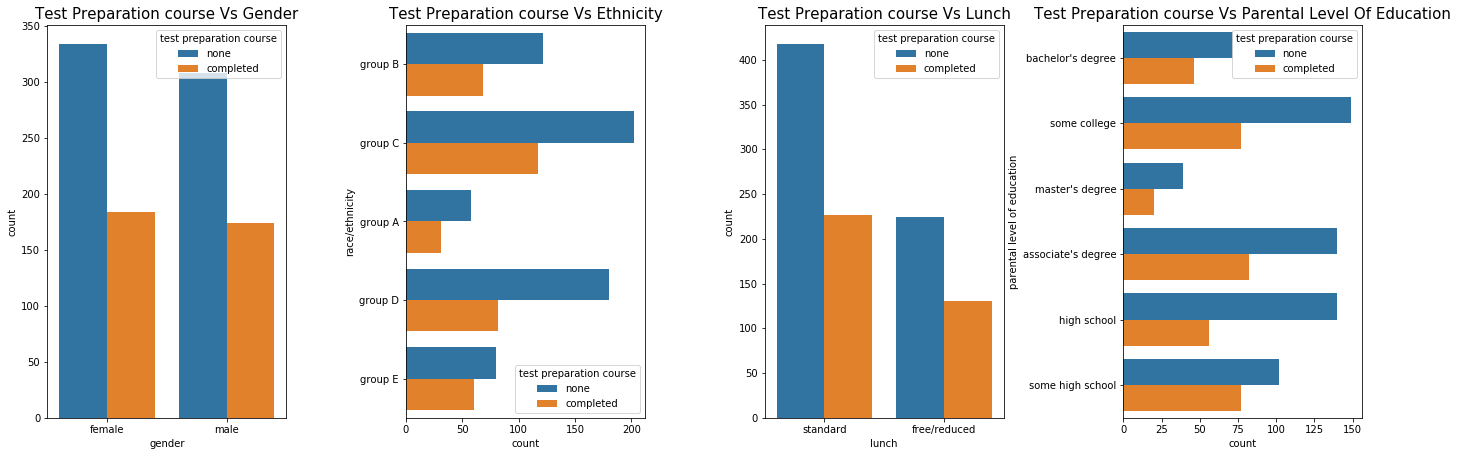

In [15]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=df)

plt.subplot(254)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)

plt.subplot(253)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=df)

plt.subplot(252)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)

plt.show()


* Most of the students not competed the test preperation course
* Higher number of students who belong to group c ethenicity has completed the test course
* Students who got standard lunch have completed the test preparation course
* Students whose parental level of education is 'some college, 'associate's degree', and  
  high school have completed the test preparation course.

### Plot for Gender Vs Ethicity

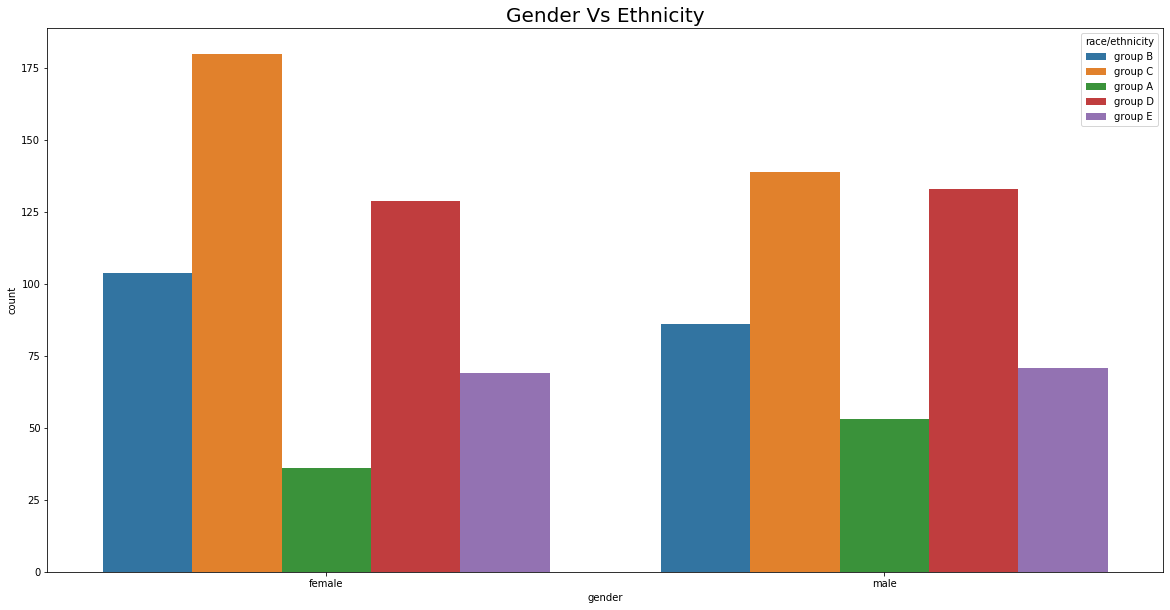

In [46]:
plt.title('Gender Vs Ethnicity',fontsize = 20)
sns.countplot(x="gender", hue="race/ethnicity", data=df)
plt.show()

* Most female belongs to group c and group D and least from group A
* Most male  belongs to group c and group D and least from group A

### Plot for Parental education VS Gender and Lunch 

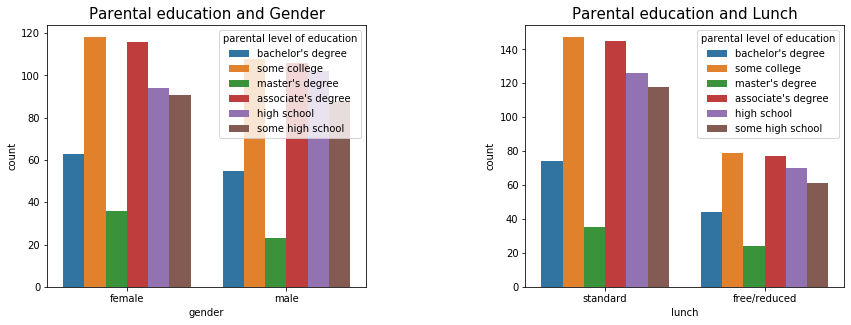

In [45]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Parental education and Gender',fontsize=15)
sns.countplot(hue="parental level of education", x="gender", data=df)

plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=15)
sns.countplot(hue="parental level of education", x="lunch", data=df)

plt.show()


To analyse data in more deeper way, lets make few more coloumns.

##  Assigning grades
* 85-100 : Grade A
* 70-84 : Grade B
* 55-69 : Grade C
* 35-54 : Grade D
* 0-35 : Grade E

In [28]:
df['total marks']=df['math score']+df['reading score']+df['writing score']

In [29]:
df['percentage']=df['total marks']/300*100

In [30]:

def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


### Pie Chart to illustrate Grade proportion

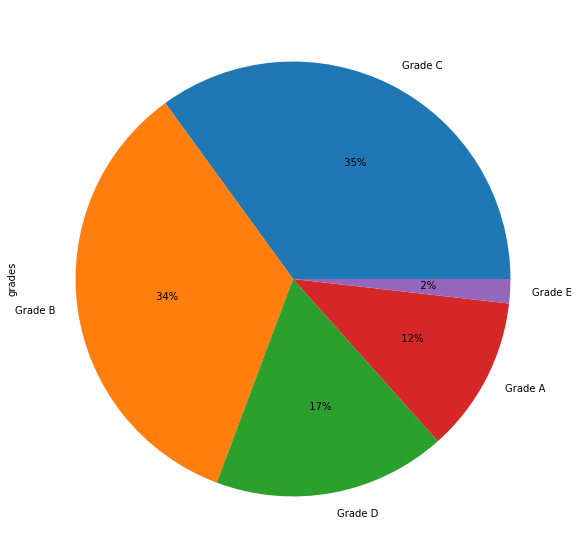

In [20]:
df['grades'].value_counts().plot.pie(autopct="%4.0f%%")
plt.show()



* Most of student got grade C  and then grade B
* 12% of student got grade A

# Plots for Grades vs All Groups

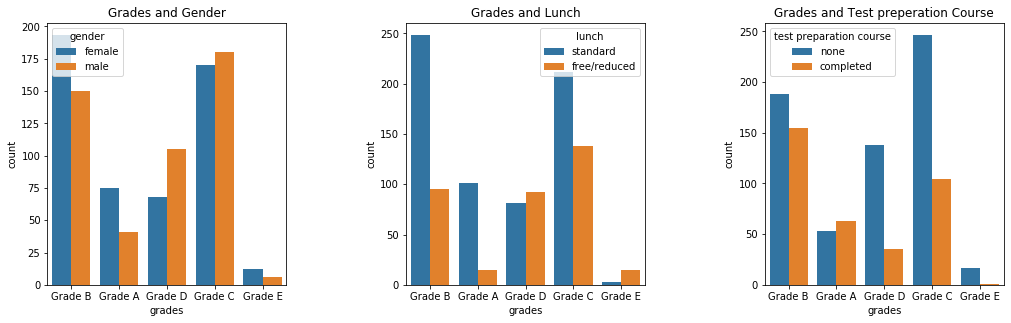

In [53]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Grades and Gender')
sns.countplot(hue="gender", x="grades", data=df)

plt.subplot(252)
plt.title('Grades and Lunch')
sns.countplot(hue="lunch", x="grades", data=df)

plt.subplot(253)
plt.title('Grades and Test preperation Course')
sns.countplot(hue="test preparation course", x="grades", data=df)

plt.show()

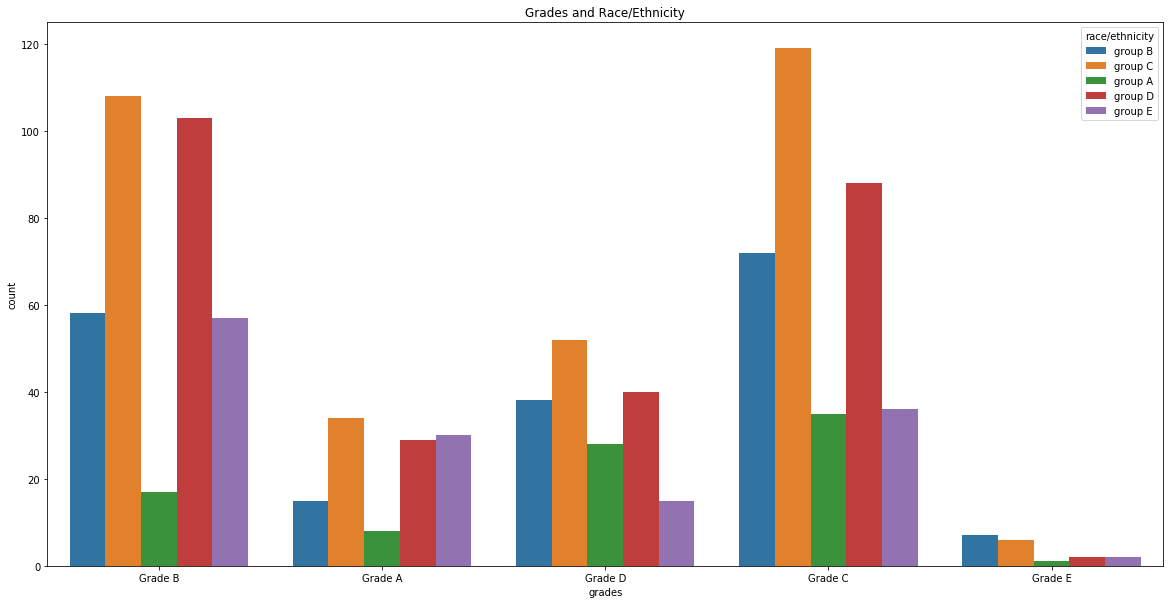

In [39]:
plt.title('Grades and Race/Ethnicity')
sns.countplot(hue="race/ethnicity", x="grades", data=df)

plt.show()

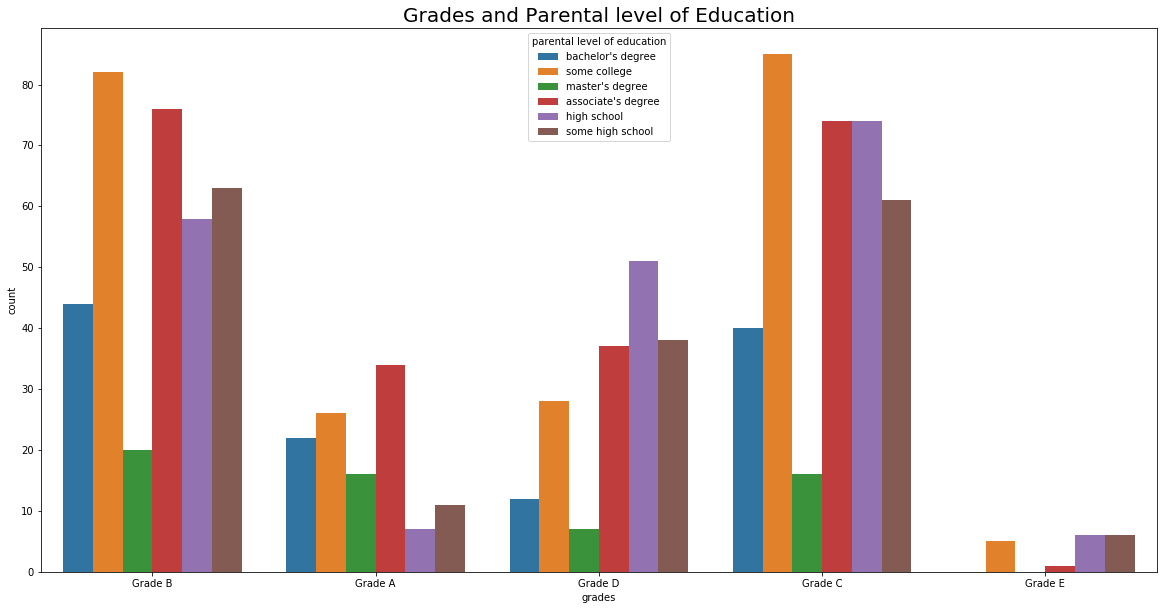

In [41]:
plt.title('Grades and Parental level of Education',fontsize=20)
sns.countplot(hue="parental level of education", x="grades", data=df)
plt.show()



* In parental level education of bachelor's degree,master's degree associate's degree and some high school most no. students got    grade B
* In parental level education of some scohool and high school most no. students got grade C
* In parental level education of bacheler's degree no student got grade E and in others degree of parental level education very less portion of student got grade E
* Grade A is highest in associate's degree

# Conclusion

# From the above analysis, we can infer that
* In maths, most students got marks in between 60-80, where male scored more in comparison to female.
* Most male and female belong to group C and group D and least from group A
* Reading and writing score has maximum correlation between them and in both (reading and writing )female scored more  
   than male.
* Higher number of students who belong to group C ethnicity has completed the test course and most of them got grade 
  C and then grade B. 
* Children with parents having associate's degree or having education from some college, were given standard lunch and also got   Grade A in highest number. 
* Children with parents having associate's degree or having education from some college, belong to group C ethnicity and most     them are female who got grade A in highest number. 
